# --- Day 1: Sonar Sweep ---

As the submarine drops below the surface of the ocean, it automatically performs a sonar sweep of the nearby sea floor. On a small screen, the sonar sweep report (your puzzle input) appears: each line is a measurement of the sea floor depth as the sweep looks further and further away from the submarine.

For example, suppose you had the following report:
```
199
200
208
210
200
207
240
269
260
263
```
This report indicates that, scanning outward from the submarine, the sonar sweep found depths of 199, 200, 208, 210, and so on.

The first order of business is to figure out how quickly the depth increases, just so you know what you're dealing with - you never know if the keys will get carried into deeper water by an ocean current or a fish or something.

To do this, count the number of times a depth measurement increases from the previous measurement. (There is no measurement before the first measurement.) In the example above, the changes are as follows:
```
199 (N/A - no previous measurement)
200 (increased)
208 (increased)
210 (increased)
200 (decreased)
207 (increased)
240 (increased)
269 (increased)
260 (decreased)
263 (increased)
```
In this example, there are 7 measurements that are larger than the previous measurement.

**How many measurements are larger than the previous measurement?**

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from plotting_functions import show_depth

In [2]:
scanned_depths = np.loadtxt("data/day01a.txt")

show_depth(scanned_depths)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [3]:
changes = np.diff(scanned_depths, prepend=np.nan)

n_increases = np.count_nonzero(changes>0)
print(f"There are {n_increases} measurements larger than the one preceding it.")

There are 1154 measurements larger than the one preceding it.


## --- Part Two ---
Considering every single measurement isn't as useful as you expected: there's just too much noise in the data.

Instead, consider sums of a three-measurement sliding window. Again considering the above example:
```
199  A      
200  A B    
208  A B C  
210    B C D
200  E   C D
207  E F   D
240  E F G  
269    F G H
260      G H
263        H
```
Start by comparing the first and second three-measurement windows. The measurements in the first window are marked A (199, 200, 208); their sum is 199 + 200 + 208 = 607. The second window is marked B (200, 208, 210); its sum is 618. The sum of measurements in the second window is larger than the sum of the first, so this first comparison increased.

Your goal now is to count the number of times the sum of measurements in this sliding window increases from the previous sum. So, compare A with B, then compare B with C, then C with D, and so on. Stop when there aren't enough measurements left to create a new three-measurement sum.

In the above example, the sum of each three-measurement window is as follows:
```
A: 607 (N/A - no previous sum)
B: 618 (increased)
C: 618 (no change)
D: 617 (decreased)
E: 647 (increased)
F: 716 (increased)
G: 769 (increased)
H: 792 (increased)
```
In this example, there are 5 sums that are larger than the previous sum.

Consider sums of a three-measurement sliding window. **How many sums are larger than the previous sum?**

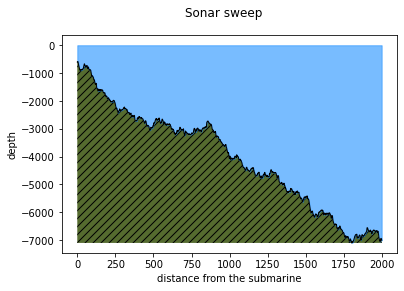

In [4]:
three_depths = np.convolve(scanned_depths, [1, 1, 1], mode='valid')

show_depth(three_depths)

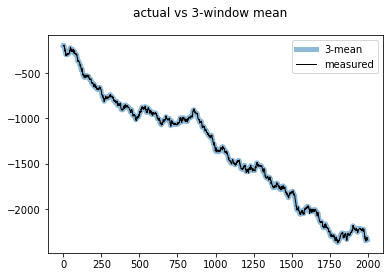

In [5]:
plt.figure()
plt.plot(-three_depths/3, lw=5, alpha=0.5, label="3-mean") # mean of three
plt.plot(-scanned_depths, lw=1, c='k', label="measured")
plt.legend()
plt.suptitle("actual vs 3-window mean")
plt.show();

In [6]:
three_changes = np.diff(three_depths, prepend=np.nan)

n_3increases = np.count_nonzero(three_changes>0)
print(f"There are {n_3increases} measurements larger than the one preceding it.")

There are 1127 measurements larger than the one preceding it.
